In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Load the spreadsheets

In [2]:
# Load each sheet
august = pd.read_excel('usage_fall19.xlsx', sheet_name='AUG 2019')
september = pd.read_excel('usage_fall19.xlsx', sheet_name='SEPT 2019')
october = pd.read_excel('usage_fall19.xlsx', sheet_name='OCT 2019, pulled 10.15.19')

In [3]:
# Update some of the column names
august.rename(columns={'Teacher Resource Usage': 'reg_usage', 'Other Usage': 'other_usage'}, inplace=True)
september.rename(columns={'Teacher Resource Usage': 'reg_usage', 'Other Usage': 'other_usage'}, inplace=True)
october.rename(columns={'Teacher Resource Usage': 'reg_usage', 'Other Usage': 'other_usage'}, inplace=True)

In [4]:
# Change all dashes for usage into zeros
august.replace('--', '0', inplace=True)
september.replace('--', '0', inplace=True)
october.replace('--', '0', inplace=True)

In [5]:
# Convert usage numbers from string to integer
august[['reg_usage', 'other_usage']] = august[['reg_usage', 'other_usage']].astype('int64')
september[['reg_usage', 'other_usage']] = september[['reg_usage', 'other_usage']].astype('int64') 
october[['reg_usage', 'other_usage']] = october[['reg_usage', 'other_usage']].astype('int64') 

In [6]:
print('august shape: ', august.shape)
print('september shape: ', september.shape)
print('october shape: ', october.shape)

august shape:  (11283, 17)
september shape:  (11283, 17)
october shape:  (11301, 17)


### Initial glance

In [7]:
august[['reg_usage']].describe()

,reg_usage
count,11283.000000
mean,47.693255
std,82.361206
min,0.000000
25%,0.000000
50%,11.000000
75%,67.000000
max,2995.000000


In [8]:
september[['reg_usage']].describe()

,reg_usage
count,11283.000000
mean,95.272179
std,122.534036
min,0.000000
25%,0.000000
50%,55.000000
75%,149.000000
max,2630.000000


In [10]:
october[['reg_usage']].describe()

,reg_usage
count,11301.000000
mean,45.089461
std,63.635517
min,0.000000
25%,0.000000
50%,21.000000
75%,69.000000
max,992.000000


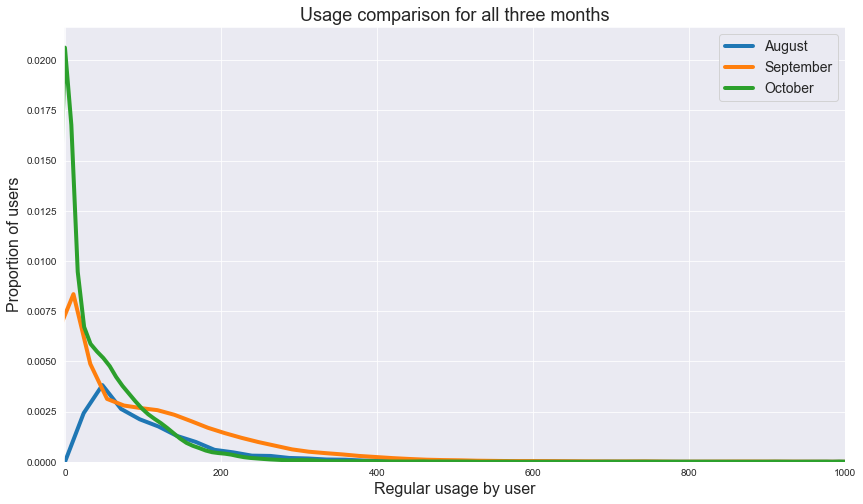

In [11]:
fig = plt.subplots(figsize = (14,8))

_ = sns.distplot(august.reg_usage, hist=False, label='August', kde_kws={'lw': 4})
_ = sns.distplot(september.reg_usage, hist=False, label='September', kde_kws={'lw': 4})
_ = sns.distplot(october.reg_usage, hist=False, label='October', kde_kws={'lw': 4})
_ = plt.xlabel('Regular usage by user', fontsize=16)
_ = plt.ylabel('Proportion of users', fontsize=16)
_ = plt.xlim(-2,1000)
_ = plt.title('Usage comparison for all three months', fontsize=18)
_ = plt.legend(fontsize=14)

It's important to note that the figures for October only cover half the month.

### Grouping

In [12]:
august['state'].fillna('undefined', inplace=True)
september['state'].fillna('undefined', inplace=True)
october['state'].fillna('undefined', inplace=True)

In [13]:
# no_states = august[august.state.isna()]
# print(no_states['district_name'].to_string())

In [14]:
august.columns

Index(['user_id', 'username', 'people_id', 'person', 'email', 'school(s)',
       'daysLoggedIn', 'weekdaysLoggedIn', 'reg_usage', 'other_usage',
       'license_district', 'order_district', 'district_name', 'state', 'rep',
       'order(s)', 'products'],
      dtype='object')

In [17]:
august['user_count'] = august.groupby('district_name')['district_name'].transform('count')

In [28]:
#august.tail()

In [25]:
desc = august.groupby('district_name')['reg_usage'].describe()

In [27]:
pd.DataFrame(desc).sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
district_name,,,,,,,,
Miami-Dade County Public School District,564.0,1.964539,17.143076,0.0,0.0,0.0,0.00,354.0
PALMDALE ELEMENTARY SCHOOL DISTRICT,282.0,11.226950,17.490361,0.0,0.0,4.0,16.75,129.0
PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,241.0,6.481328,14.452821,0.0,0.0,0.0,6.00,85.0
DALLAS ISD,224.0,39.017857,61.230357,0.0,0.0,10.0,56.25,512.0
HOUSTON ISD,197.0,34.360406,61.592945,0.0,0.0,7.0,43.00,330.0
...,...,...,...,...,...,...,...,...
CUBA-RUSHFORD CENTRAL SCHOOL DISTRICT,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
NEWPORT SCHOOL DISTRICT,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
NEWTON COUNTY SCHOOL DISTRICT,1.0,137.000000,NaN,137.0,137.0,137.0,137.00,137.0


### September

Focusing on the month of September, likely the only month here with complete data.

In [74]:
september['distr_st_rep'] = september['rep'] + '-' + september['state'] + '-' + september['district_name']

In [75]:
s_desc = september.groupby('distr_st_rep')['reg_usage'].describe()
sept_stats = pd.DataFrame(s_desc).sort_values('count', ascending=False)

In [76]:
sept_stats

,count,mean,std,min,25%,50%,75%,max
distr_st_rep,,,,,,,,
Smith-FL-Miami-Dade County Public School District,564.0,2.762411,21.918149,0.0,0.0,0.0,0.0,393.0
Borland-CA-PALMDALE ELEMENTARY SCHOOL DISTRICT,282.0,3.276596,7.710146,0.0,0.0,0.0,2.0,57.0
Maddox-MD-PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,241.0,72.443983,100.984683,0.0,0.0,23.0,115.0,560.0
Phillips-TX-DALLAS ISD,224.0,85.258929,118.546901,0.0,0.0,34.0,123.5,621.0
Phillips-TX-HOUSTON ISD,197.0,104.020305,160.343189,0.0,0.0,28.0,166.0,1120.0
...,...,...,...,...,...,...,...,...
Roman-FL-ST. JOHNS,1.0,272.000000,NaN,272.0,272.0,272.0,272.0,272.0
Maus-NE-GILTNER PUBLIC SCHOOLS,1.0,145.000000,NaN,145.0,145.0,145.0,145.0,145.0
Maddox-OH-BUCKEYE CENTRAL LOCAL,1.0,227.000000,NaN,227.0,227.0,227.0,227.0,227.0


In [77]:
sept_stats['above_avg'] = 'n'

In [78]:
sept_stats.loc[sept_stats['mean'] >= 95.272179, 'above_avg'] = 'y'

In [79]:
sept_stats

,count,mean,std,min,25%,50%,75%,max,above_avg
distr_st_rep,,,,,,,,,
Smith-FL-Miami-Dade County Public School District,564.0,2.762411,21.918149,0.0,0.0,0.0,0.0,393.0,n
Borland-CA-PALMDALE ELEMENTARY SCHOOL DISTRICT,282.0,3.276596,7.710146,0.0,0.0,0.0,2.0,57.0,n
Maddox-MD-PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,241.0,72.443983,100.984683,0.0,0.0,23.0,115.0,560.0,n
Phillips-TX-DALLAS ISD,224.0,85.258929,118.546901,0.0,0.0,34.0,123.5,621.0,n
Phillips-TX-HOUSTON ISD,197.0,104.020305,160.343189,0.0,0.0,28.0,166.0,1120.0,y
...,...,...,...,...,...,...,...,...,...
Roman-FL-ST. JOHNS,1.0,272.000000,NaN,272.0,272.0,272.0,272.0,272.0,y
Maus-NE-GILTNER PUBLIC SCHOOLS,1.0,145.000000,NaN,145.0,145.0,145.0,145.0,145.0,y
Maddox-OH-BUCKEYE CENTRAL LOCAL,1.0,227.000000,NaN,227.0,227.0,227.0,227.0,227.0,y


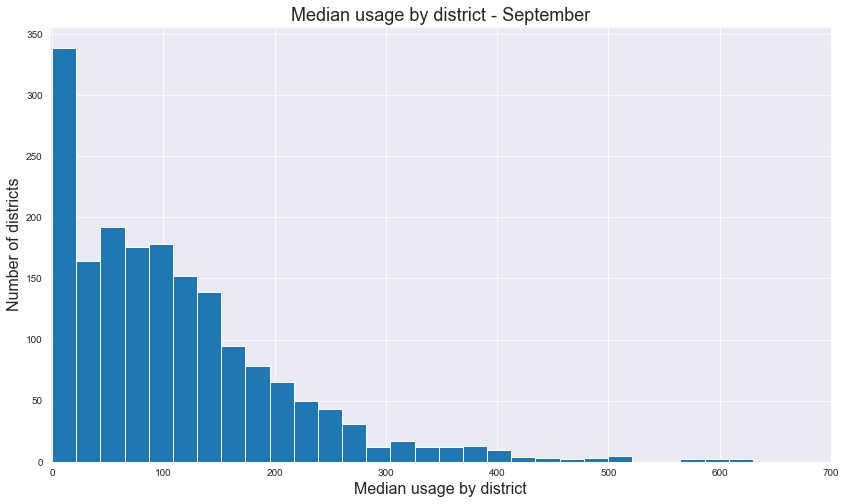

In [80]:
fig = plt.subplots(figsize = (14,8))
_ = plt.hist(sept_stats['50%'], bins=50)
_ = plt.xlabel('Median usage by district', fontsize=16)
_ = plt.ylabel('Number of districts', fontsize=16)
_ = plt.xlim(-2,700)
_ = plt.title('Median usage by district - September', fontsize=18)

In [81]:
count_y = len(sept_stats[sept_stats.above_avg == 'y'])
count_n = len(sept_stats[sept_stats.above_avg == 'n'])

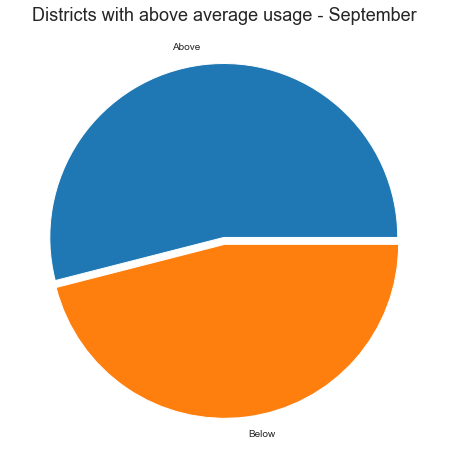

In [82]:
avg_cnts = [count_y, count_n]
labels = 'Above', 'Below'
explode = (0.04, 0)

fig = plt.subplots(figsize = (14,8))
_ = plt.pie(avg_cnts, explode=explode, labels=labels)
#_ = plt.xlabel('Median usage by district', fontsize=16)
#_ = plt.ylabel('Number of districts', fontsize=16)
_ = plt.title('Districts with above average usage - September', fontsize=18)

#### Districts not above average

Filtering districts based on their mean usage and focusing on the ones that are below the cumulative average.

In [92]:
below = sept_stats[sept_stats.above_avg == 'n']
len(below)

831

In [90]:
#below = below[below['count'] > 0.0].sort_index()

In [93]:
wr = pd.ExcelWriter('usage_by_district.xlsx')

below.to_excel(wr, sheet_name='Below average districts')
sept_stats.to_excel(wr, sheet_name='Regular usage by district')

wr.save()

<b>Max user</b>

In [98]:
import numpy as np

september[september.reg_usage == np.max(september.reg_usage)]

,user_id,username,people_id,person,email,school(s),daysLoggedIn,weekdaysLoggedIn,reg_usage,other_usage,license_district,order_district,district_name,state,rep,order(s),products,distr_st_rep
8165,288290,RYANBAN,35211,Tanuja Gomes,piyushp@fsm.net.in,Furtados School of Music,29,22,2630,0,1000000046,1.000000e+09,INTERNATIONAL PUBLIC SCHOOLS,XX,Smith,679712167,"QK5-01-01b,QGK-05-01b,QGK-03-01d",Smith-XX-INTERNATIONAL PUBLIC SCHOOLS


### Percent of users with above average usage